In [4]:
# # use python script to take all 3216 gather files and only keep lines with spp of importance
# import pandas as pd

# what spp
# df = pd.read_csv('../data/gather.gtdbmags.0k_99.csv')
# df

In [5]:
# import sys
# import pandas as pd
# from pathlib import Path

# input_path = Path(sys.argv[1])
# output_file = sys.argv[2]

# targets = [
#     "s__Prevotella sp002251295",
#     "s__Bariatricus sp004560705",
#     "s__Cryptobacteroides sp900546925",
#     "s__Lactobacillus amylovorus",
#     "s__Escherichia coli",
#     "s__Mogibacterium_A kristiansenii",
#     "s__Holdemanella porci",
#     "s__JALFVM01 sp022787145",
#     "s__Floccifex porci",
#     "s__UBA2868 sp004552595",
#     "s__Sodaliphilus sp004557565",
#     "s__Limosilactobacillus reuteri",
#     "s__JAFBIX01 sp021531895"
# ]

# pattern = "|".join(targets)
# dfs = []

# # Check if input is a directory or a single file
# if input_path.is_dir():
#     csv_files = list(input_path.glob("*.mags_and_gtdb.csv"))
# else:
#     csv_files = [input_path]

# for csv_file in csv_files:
#     df = pd.read_csv(csv_file)
#     df_filtered = df[df["name"].str.contains(pattern, case=False, na=False)]
#     dfs.append(df_filtered)

# if dfs:
#     pd.concat(dfs, ignore_index=True).drop_duplicates().to_csv(output_file, index=False)
# else:
#     print("No matching files or rows found.")


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_meta = pd.read_csv('../data/SRA_meta.3216.csv')
df_meta = df_meta[['acc', 'mbases']]

In [2]:
import pandas as pd
df2 = pd.read_csv('../data/251029_corespp.pangdb.gather.csv')
len(df2)

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_52456/294192147.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


47678

In [3]:
df2['name'] = df2['name'].str.extract(r'(s__.*)$')
df2['name'] = df2['name'].str.replace('^s__', '', regex=True)


In [11]:
counts = df2['name'].value_counts()


In [29]:
core_species = counts[counts > 3100].index.tolist()
len(core_species)

12

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # assuming df is your dataframe
# species = "Sodaliphilus sp004557565"

# df_sub = df2[df2["name"] == species]

# plt.figure(figsize=(6,4))
# plt.scatter(df_sub["median_abund"], df_sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
# plt.xlabel("Median abundance")
# plt.ylabel("Intersect bp")
# plt.title(species)
# plt.xlim(0, 20)

# plt.tight_layout()
# plt.show()


In [18]:
df_mbases = pd.merge(df_meta, df2, left_on='acc', right_on='query_name', how='inner')

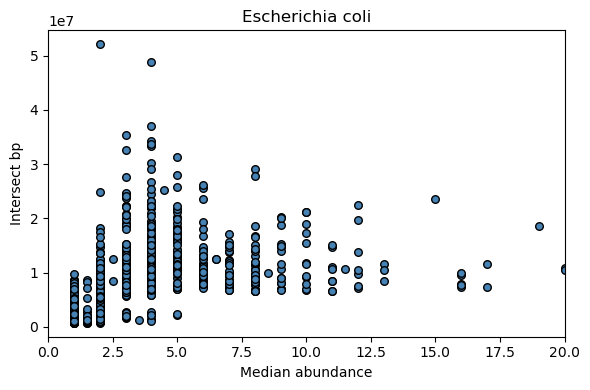

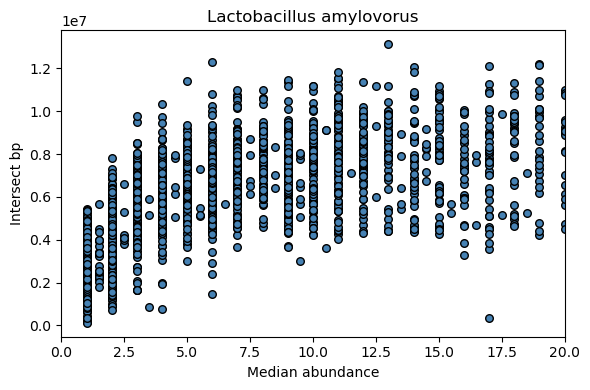

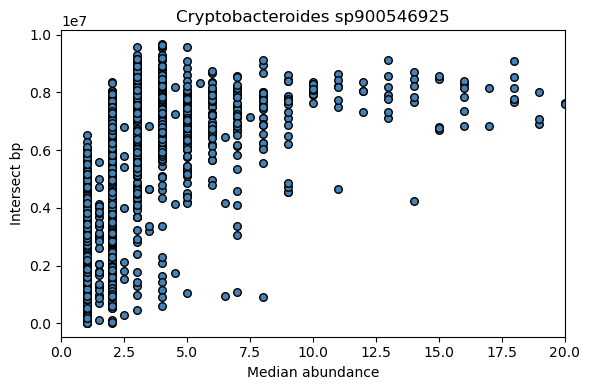

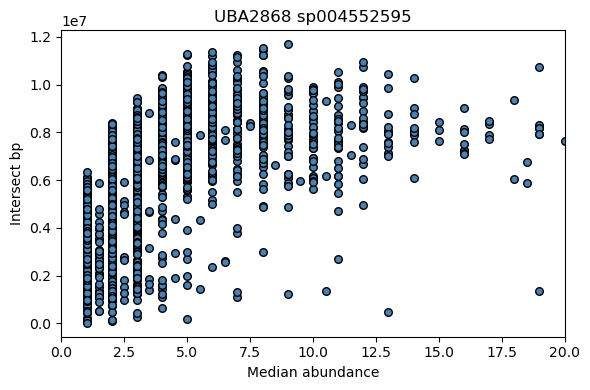

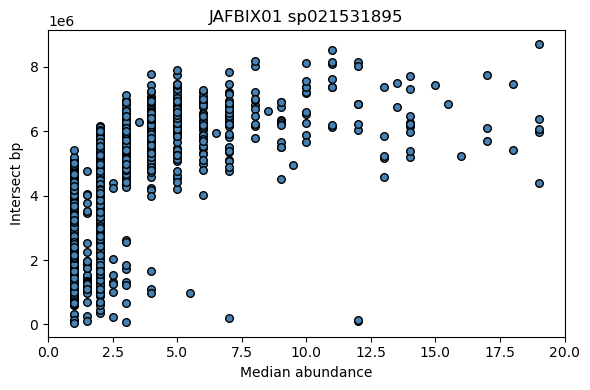

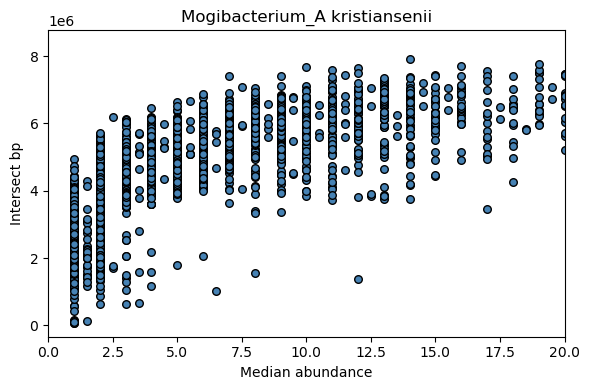

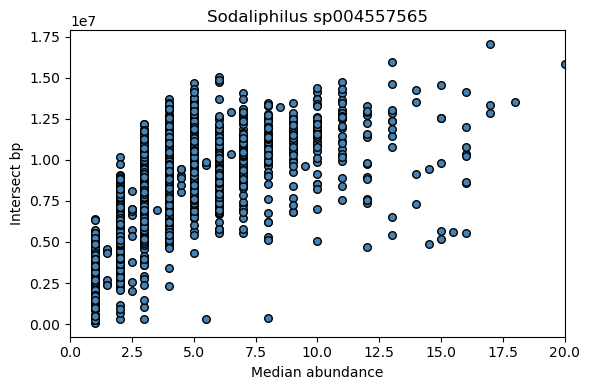

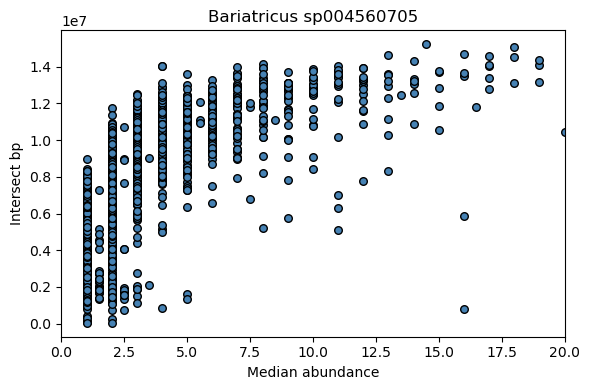

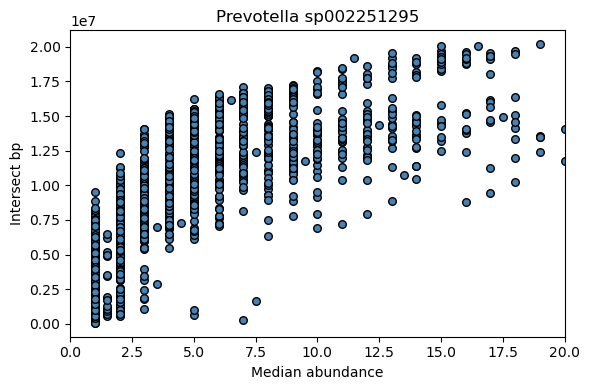

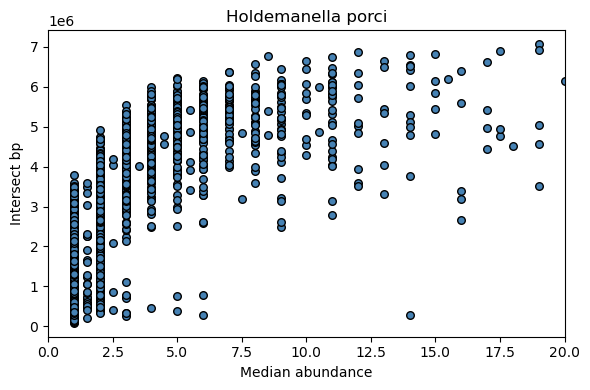

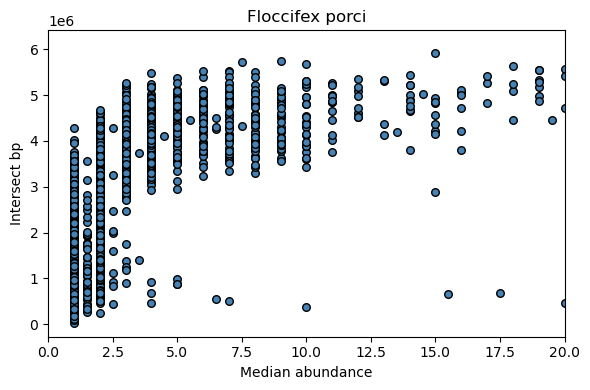

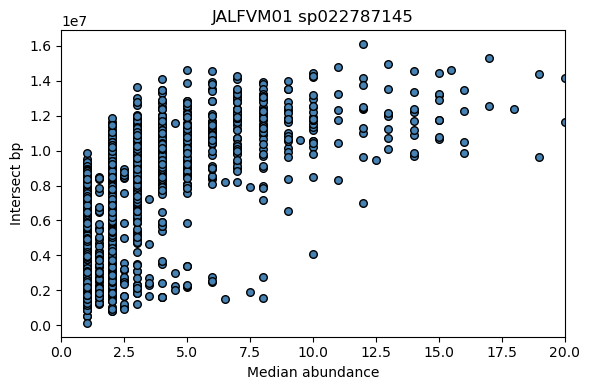

In [34]:



for name in core_species:
    sub = df2[df2["name"] == name]
    plt.figure(figsize=(6,4))
    plt.scatter(sub["median_abund"], sub["intersect_bp"], s=30, color="steelblue", edgecolor="k")
    plt.xlabel("Median abundance")
    plt.ylabel("Intersect bp")
    plt.title(name)
    plt.xlim(0, 20)
    plt.tight_layout()
    plt.show()


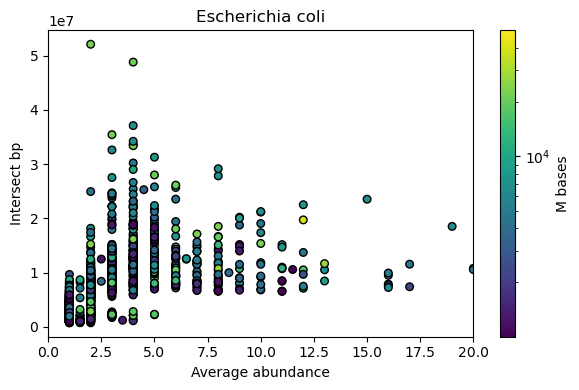

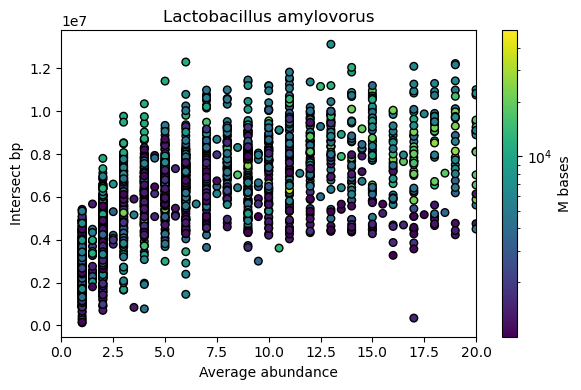

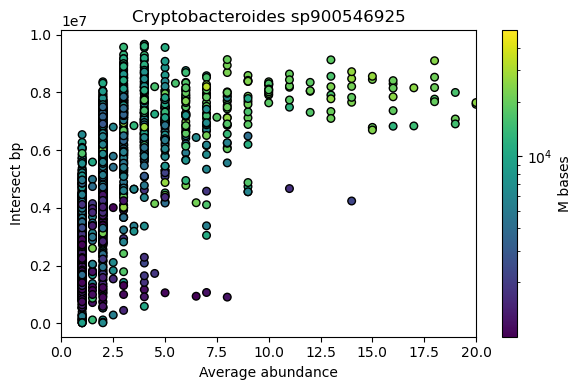

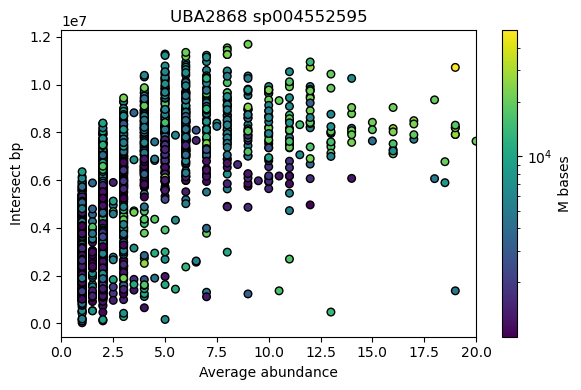

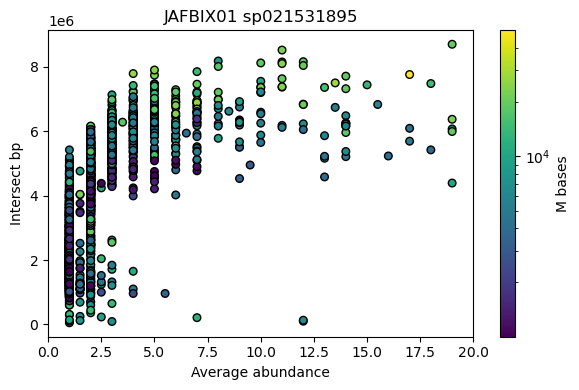

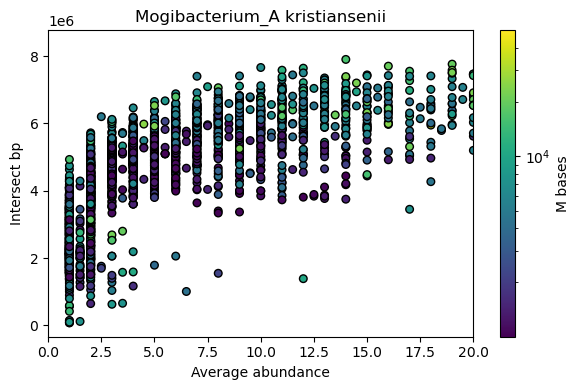

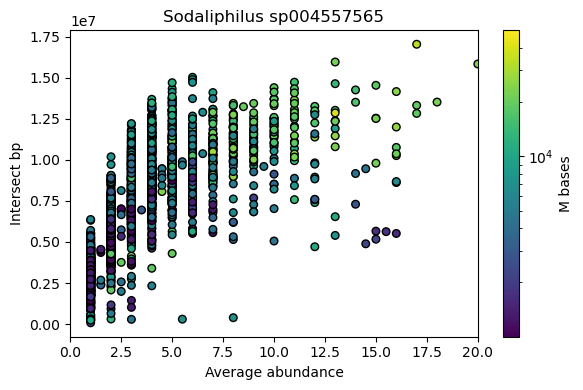

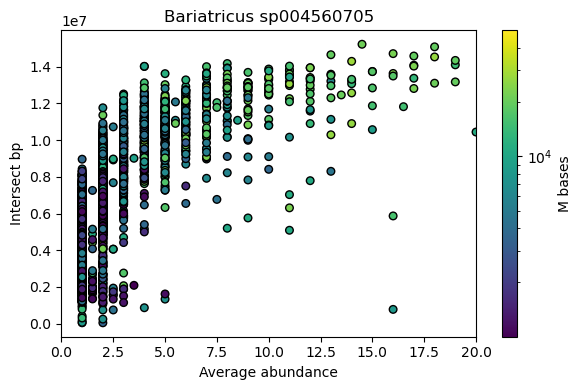

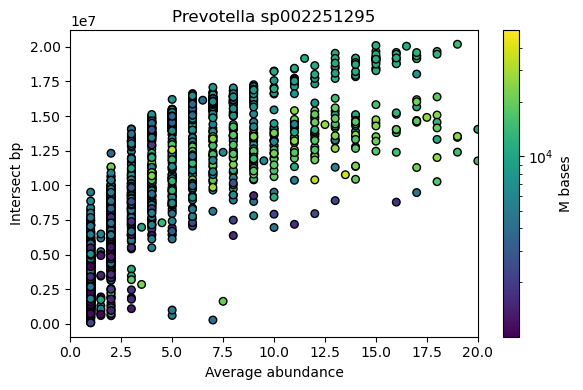

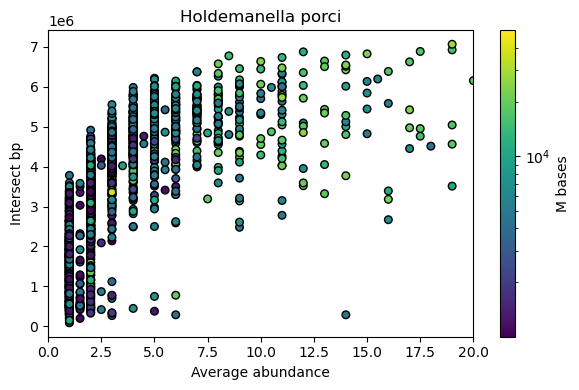

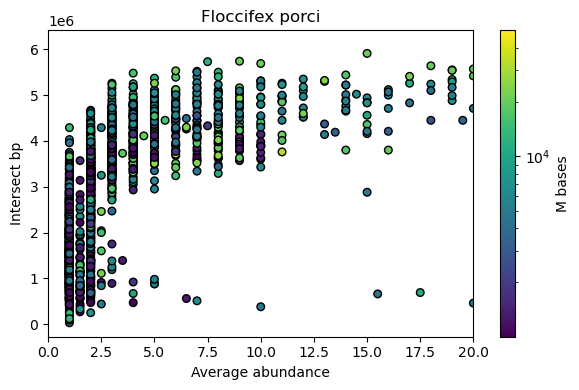

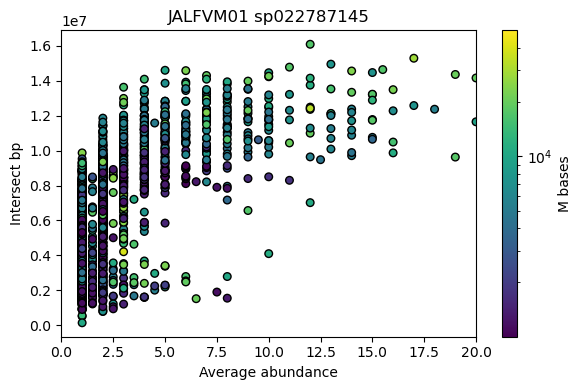

In [37]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
for name in core_species:
    sub = df_mbases[df_mbases["name"] == name]

    plt.figure(figsize=(6,4))
    sc = plt.scatter(
        sub["median_abund"],
        sub["intersect_bp"],
        c=sub["mbases"],             # color by mbases
        cmap="viridis",
        norm=LogNorm(),
        s=30,
        edgecolor="k"
    )
    plt.xlabel("Average abundance")
    plt.ylabel("Intersect bp")
    plt.title(name)
    plt.xlim(0, 20)
    plt.colorbar(sc, label="M bases")  # add colorbar
    plt.tight_layout()
    plt.show()
